# Table of Contents

[1.Background & Introduction](#1)<br>
[2.Analysis on our Data](#2)<br>
[3. Data Cleaning](#3)<br>
[4. Exploratory Data Analysis](#4)<br>
[5.Futher Analysis and Conclusions](#5)<br>

# Background & Introduction <a id='1'></a>:

# What We Know About Food Waste Management:
 

"While the food waste movement across America is gaining momentum, 
it needs to pick up speed to help tackle climate change. 
Wasting food has irreversible environmental consequences: 
it wastes the water and energy it took to produce it, 
and generates greenhouse gases — 7 percent of the world’s emissions
9 — like methane, carbon dioxide and chlorofluorocarbons, 
which contribute to global warming. Food that sits decaying in 
landfills also produces nitrogen pollution, which causes algae 
blooms and dead zones. According to the World Wildlife Federation, 
the production of wasted food in the United States is equivalent
to the greenhouse emissions of 37 million cars. 
If Americans continue on the same path of food loss, the environmental
impact could be disastrous." - RTS NYC Waste Management 


Andrew Cuomo Dedicated A Plan in 2019, to reduce the amount of food waste to promote food change and fight climate change, this is where he started implemeting things such as decreasing the amount of plastic bags that were being 
used in NYC. He made a total donation of $4.3 million for municipal food grants, food donation, and recycling. 

Waste Management Inc stock as of March 25 reached a 52 week high, and 15.6% growth since before COVID-19. This shows that more money is being distrubuted into making a more sustaniable environment. 

Applications like Too Good To Go, explore new options of changing resturant food waste 
management by allowing them to sell what they don't use by the end of the night for 1/4 
of the price. 

- Food Waste Managament is a disruption to ground - water pollution. 
- Many people stock-piled food during the midst of the pandemic due to high levels of anxiety, due to lack of security of jobs.
- Food sales during COVID in grocery stores were scarce, and resturants faced a lack of sales. 
- Households are the largest contributor to food waste. 
- Joe Biden has concetrateded his time to create a more sustaniable environment during his presidency. 
- More than 550 community and environmental advocacy groups, led in part by the Center for Biological Diversity, are urging President-elect Joe Biden to take a series of actions in eight areas that could reduce plastics entering the waste stream, place new limitations on how they're managed and stimulate market demand. 

# Why We Are Analyzing This Data:
- New York makes about 3.9 millions of tons of wasted food from New York and landfills. 
- 12.8 % of New Yorkers are Food Insecure. 

# My Hypothesis:

During COVID - 19, food waste management improved due to more implementations of community fridges,less buisness and schools being open. There was also less food waste in some boroughs due to food insecurity. 

# Research Goals:
    - Did Food Waste Management Improve During COVID -19 in NYC?
    - How Bad Was Food Waste Management Before COVID -19 in NYC ?
    - What Boroughs Have The Best Food Waste Management ?
    - Did Andrew Cuomo's 4.3 Million in Grants to Reduce Food Waste Actually Make Changes ?

# We are installing the Pandas Profiling, to gain an explanatory analysis on the dataframe. This allows us to see the overall profile report rendered into an HTML. 

In [1]:
pip install pandas-profiling

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import datetime
import pandas_profiling 

# Data Analysis <a id='2'></a>:

 First dataset, we are analyzing is the Monthly Tonnage Data from The Department of Sanitation. This gives us data from the Department of Sanitation tons of waste collected monthly, it has been updated monthly since 1990. 

In [3]:
df = pd.read_csv("DSNY_Monthly_Tonnage_Data.csv")
df.head()

MONTH    BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  \
0  1993 / 11  Manhattan                01                625.2   
1  1992 / 03  Manhattan                01                726.0   
2  1995 / 08  Manhattan                01                627.5   
3  1991 / 08  Manhattan                01                695.1   
4  1995 / 09  Manhattan                01                633.1   

   PAPERTONSCOLLECTED  MGPTONSCOLLECTED  RESORGANICSTONS  SCHOOLORGANICTONS  \
0               119.4              34.4              NaN                NaN   
1                 NaN               NaN              NaN                NaN   
2                82.4              35.6              NaN                NaN   
3                 NaN               NaN              NaN                NaN   
4               117.2              45.8              NaN                NaN   

   LEAVESORGANICTONS  XMASTREETONS  BOROUGH_ID  
0                NaN           NaN         1.0  
1                NaN           NaN         1.0  
2                NaN           NaN         1.0  
3                NaN           NaN         1.0  
4                NaN           NaN         1.0

# Our Profile Report of our Dataset:

In [4]:
df.profile_report()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From our profile report, we are able to gather that majority of the data that we are dealing with categorical data. There is also a total 
of 36% missing data in the cells, in other words 86224.There is borough data, yet there is only 1111 cells for Staten Island. Meaning, there's pronably not as much data of tons collected from Staten Island or we might have missing data from Staten Island.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21405 entries, 0 to 21404
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                21405 non-null  object 
 1   BOROUGH              21405 non-null  object 
 2   COMMUNITYDISTRICT    21405 non-null  object 
 3   REFUSETONSCOLLECTED  21402 non-null  float64
 4   PAPERTONSCOLLECTED   18780 non-null  float64
 5   MGPTONSCOLLECTED     18492 non-null  float64
 6   RESORGANICSTONS      1613 non-null   float64
 7   SCHOOLORGANICTONS    1030 non-null   float64
 8   LEAVESORGANICTONS    758 non-null    float64
 9   XMASTREETONS         1539 non-null   float64
 10  BOROUGH_ID           21402 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.8+ MB


 We use df.info to analyze the datatypes that we are working with to understand how to analyze the data.It also allows us to view the different columns we have and how many null values are present. 

# Based on our analysis report, theres a couple things we want to drop, such as papertonscollected, xmastreetons, leaveorganictons,and mpgtonscolected.The reason we are dropping these columns:
    - PaperTonsCollected represents recycled paper that was seperated by residents for collection 
    - Xmastreetons represents christmas trees that were collected by the Department of Sanitation. 
    - MPGtonscollected represents the tons seperated by recyaclable by metal, glass, and beverage bottles. 
    - Leaveorganictons represents the leaves collected between November - December. 

# Things We Keep:
   - SchoolOrganicTons: This includes food scraps, food-soiled  papers,that were collected by schools serviced 
        by the DOE. 
    - Boroughs 
    - Borough ID: ID seperated per borough 
    - borugh: column that represents each borough 
    - Month : Seperated the dates by year / month 
    - Community District: Each 59 community districts that corresponds to the Department of Sanitation.
    - RefuseTonsCollected: Trash that was refused to be collected 
    - ResorganicTons: Food scraps, food soiled papers, yard waste on the curbside of neighborhoods. 
        

# Cleaning Our Data <a id='3'></a>:

# Drop the columns that are unecessary 

In [6]:
# df.drop(['B', 'C'], axis=1)
df = df.drop(['LEAVESORGANICTONS','MGPTONSCOLLECTED','PAPERTONSCOLLECTED','XMASTREETONS'], axis = 1)
df 

MONTH    BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  \
0      1993 / 11  Manhattan                01                625.2   
1      1992 / 03  Manhattan                01                726.0   
2      1995 / 08  Manhattan                01                627.5   
3      1991 / 08  Manhattan                01                695.1   
4      1995 / 09  Manhattan                01                633.1   
...          ...        ...               ...                  ...   
21400  2017 / 07      Bronx                06               2143.5   
21401  2019 / 02      Bronx                06               1921.2   
21402  2018 / 10      Bronx                06               2281.1   
21403  2017 / 12      Bronx                06               2087.1   
21404  2019 / 04      Bronx                06               2246.0   

       RESORGANICSTONS  SCHOOLORGANICTONS  BOROUGH_ID  
0                  NaN                NaN         1.0  
1                  NaN                NaN         1.0  
2                  NaN                NaN         1.0  
3                  NaN                NaN         1.0  
4                  NaN                NaN         1.0  
...                ...                ...         ...  
21400              NaN                NaN         2.0  
21401             10.6               29.7         2.0  
21402              8.1               73.9         2.0  
21403              NaN               41.2         2.0  
21404             12.1               34.7         2.0  

[21405 rows x 7 columns]

 Find the sum of all the null-values to see what areas deserve to be dropped.From this we can tell that the resorganic and schoolorganictons have the largest null values.We can conclude that because schools have been closed and aren't open during several seasons they collect less waste.Also not all neighborhoods refuse waste.

In [7]:
df.isna().sum()

MONTH                      0
BOROUGH                    0
COMMUNITYDISTRICT          0
REFUSETONSCOLLECTED        3
RESORGANICSTONS        19792
SCHOOLORGANICTONS      20375
BOROUGH_ID                 3
dtype: int64

There is still some null values in our dataset.

In [8]:
df[df.isnull()]

MONTH BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  RESORGANICSTONS  \
0       NaN     NaN               NaN                  NaN              NaN   
1       NaN     NaN               NaN                  NaN              NaN   
2       NaN     NaN               NaN                  NaN              NaN   
3       NaN     NaN               NaN                  NaN              NaN   
4       NaN     NaN               NaN                  NaN              NaN   
...     ...     ...               ...                  ...              ...   
21400   NaN     NaN               NaN                  NaN              NaN   
21401   NaN     NaN               NaN                  NaN              NaN   
21402   NaN     NaN               NaN                  NaN              NaN   
21403   NaN     NaN               NaN                  NaN              NaN   
21404   NaN     NaN               NaN                  NaN              NaN   

       SCHOOLORGANICTONS  BOROUGH_ID  
0                    NaN         NaN  
1                    NaN         NaN  
2                    NaN         NaN  
3                    NaN         NaN  
4                    NaN         NaN  
...                  ...         ...  
21400                NaN         NaN  
21401                NaN         NaN  
21402                NaN         NaN  
21403                NaN         NaN  
21404                NaN         NaN  

[21405 rows x 7 columns]

I used iloc to be able to determine what values in these columns are null.
Only two columns in this row, are null therefore if we drop this data,
we can be loosing important information.

In [9]:
df.iloc[21400]

MONTH                  2017 / 07
BOROUGH                    Bronx
COMMUNITYDISTRICT             06
REFUSETONSCOLLECTED       2143.5
RESORGANICSTONS              NaN
SCHOOLORGANICTONS            NaN
BOROUGH_ID                   2.0
Name: 21400, dtype: object

 We want to be able to split the data of the month between month and year so we use the split method. 

In [10]:
df['MONTH'].str.split('/')

0        [1993 ,  11]
1        [1992 ,  03]
2        [1995 ,  08]
3        [1991 ,  08]
4        [1995 ,  09]
             ...     
21400    [2017 ,  07]
21401    [2019 ,  02]
21402    [2018 ,  10]
21403    [2017 ,  12]
21404    [2019 ,  04]
Name: MONTH, Length: 21405, dtype: object

 Once we have split this data, we rename the dataset into two split columns 

In [11]:
split_month = df['MONTH'].str.split('/', n = 1, expand = True)
split_month.rename(columns={0:'Year', 1:'Momth'})

Year Momth
0      1993     11
1      1992     03
2      1995     08
3      1991     08
4      1995     09
...      ...   ...
21400  2017     07
21401  2019     02
21402  2018     10
21403  2017     12
21404  2019     04

[21405 rows x 2 columns]

# Now we append this into the dataframe 

In [12]:
df[['Year','Month']] = df["MONTH"].str.split('/', n=1, expand=True)
df

MONTH    BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  \
0      1993 / 11  Manhattan                01                625.2   
1      1992 / 03  Manhattan                01                726.0   
2      1995 / 08  Manhattan                01                627.5   
3      1991 / 08  Manhattan                01                695.1   
4      1995 / 09  Manhattan                01                633.1   
...          ...        ...               ...                  ...   
21400  2017 / 07      Bronx                06               2143.5   
21401  2019 / 02      Bronx                06               1921.2   
21402  2018 / 10      Bronx                06               2281.1   
21403  2017 / 12      Bronx                06               2087.1   
21404  2019 / 04      Bronx                06               2246.0   

       RESORGANICSTONS  SCHOOLORGANICTONS  BOROUGH_ID   Year Month  
0                  NaN                NaN         1.0  1993     11  
1                  NaN                NaN         1.0  1992     03  
2                  NaN                NaN         1.0  1995     08  
3                  NaN                NaN         1.0  1991     08  
4                  NaN                NaN         1.0  1995     09  
...                ...                ...         ...    ...   ...  
21400              NaN                NaN         2.0  2017     07  
21401             10.6               29.7         2.0  2019     02  
21402              8.1               73.9         2.0  2018     10  
21403              NaN               41.2         2.0  2017     12  
21404             12.1               34.7         2.0  2019     04  

[21405 rows x 9 columns]

We check our data-types of our dataframe,because in order to make 
a conditional statement to analyze the data betweeen a specific year, 
the data must be an integer.

In [13]:
df.dtypes

MONTH                   object
BOROUGH                 object
COMMUNITYDISTRICT       object
REFUSETONSCOLLECTED    float64
RESORGANICSTONS        float64
SCHOOLORGANICTONS      float64
BOROUGH_ID             float64
Year                    object
Month                   object
dtype: object

Convert the columns into integer. 

In [14]:
# we need to see how we can convert the columns into int
df['Year'] = df.Year.astype(int)
df['Month'] = df.Month.astype(int)

In [15]:
df.dtypes

MONTH                   object
BOROUGH                 object
COMMUNITYDISTRICT       object
REFUSETONSCOLLECTED    float64
RESORGANICSTONS        float64
SCHOOLORGANICTONS      float64
BOROUGH_ID             float64
Year                     int64
Month                    int64
dtype: object

# We now can drop our Month Column, since we have a more detailed column for it  

In [16]:
df = df.drop(['MONTH'], axis = 1)

In [17]:
df

BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  RESORGANICSTONS  \
0      Manhattan                01                625.2              NaN   
1      Manhattan                01                726.0              NaN   
2      Manhattan                01                627.5              NaN   
3      Manhattan                01                695.1              NaN   
4      Manhattan                01                633.1              NaN   
...          ...               ...                  ...              ...   
21400      Bronx                06               2143.5              NaN   
21401      Bronx                06               1921.2             10.6   
21402      Bronx                06               2281.1              8.1   
21403      Bronx                06               2087.1              NaN   
21404      Bronx                06               2246.0             12.1   

       SCHOOLORGANICTONS  BOROUGH_ID  Year  Month  
0                    NaN         1.0  1993     11  
1                    NaN         1.0  1992      3  
2                    NaN         1.0  1995      8  
3                    NaN         1.0  1991      8  
4                    NaN         1.0  1995      9  
...                  ...         ...   ...    ...  
21400                NaN         2.0  2017      7  
21401               29.7         2.0  2019      2  
21402               73.9         2.0  2018     10  
21403               41.2         2.0  2017     12  
21404               34.7         2.0  2019      4  

[21405 rows x 8 columns]

We are filling our null value, with 0 instead. So, we can still take in consideration all data that we have. 

In [18]:
df = df.fillna(0)

In [19]:
df

BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  RESORGANICSTONS  \
0      Manhattan                01                625.2              0.0   
1      Manhattan                01                726.0              0.0   
2      Manhattan                01                627.5              0.0   
3      Manhattan                01                695.1              0.0   
4      Manhattan                01                633.1              0.0   
...          ...               ...                  ...              ...   
21400      Bronx                06               2143.5              0.0   
21401      Bronx                06               1921.2             10.6   
21402      Bronx                06               2281.1              8.1   
21403      Bronx                06               2087.1              0.0   
21404      Bronx                06               2246.0             12.1   

       SCHOOLORGANICTONS  BOROUGH_ID  Year  Month  
0                    0.0         1.0  1993     11  
1                    0.0         1.0  1992      3  
2                    0.0         1.0  1995      8  
3                    0.0         1.0  1991      8  
4                    0.0         1.0  1995      9  
...                  ...         ...   ...    ...  
21400                0.0         2.0  2017      7  
21401               29.7         2.0  2019      2  
21402               73.9         2.0  2018     10  
21403               41.2         2.0  2017     12  
21404               34.7         2.0  2019      4  

[21405 rows x 8 columns]

In [20]:
df.isna().sum()

BOROUGH                0
COMMUNITYDISTRICT      0
REFUSETONSCOLLECTED    0
RESORGANICSTONS        0
SCHOOLORGANICTONS      0
BOROUGH_ID             0
Year                   0
Month                  0
dtype: int64

# We are going to analyze the data throughout lockdown, which was the year 2020, since we do not have all the data to contrast from the year 2020-2021 as of yet. 

In [21]:
during_covid = df[df['Year'] == 2020]
during_covid

BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  RESORGANICSTONS  \
55          Brooklyn                07               3395.3              1.3   
56          Brooklyn                07               3722.6              0.0   
58          Brooklyn                07               3052.6             57.1   
88     Staten Island                03               6772.4              0.0   
187           Queens                05               5191.7              0.0   
...              ...               ...                  ...              ...   
21180          Bronx                07               3240.4              0.0   
21258      Manhattan                01               1209.4              0.0   
21303       Brooklyn                04               3562.6              0.0   
21304       Brooklyn                04               3419.2              0.0   
21348          Bronx                03               2326.3              0.0   

       SCHOOLORGANICTONS  BOROUGH_ID  Year  Month  
55                   0.0         3.0  2020      5  
56                   0.0         3.0  2020      8  
58                  68.5         3.0  2020      3  
88                   0.0         5.0  2020      7  
187                  0.0         4.0  2020     12  
...                  ...         ...   ...    ...  
21180                0.0         2.0  2020      2  
21258                0.0         1.0  2020      8  
21303                0.0         3.0  2020     10  
21304                0.0         3.0  2020      5  
21348                0.0         2.0  2020      8  

[710 rows x 8 columns]

In [22]:
during_covid_sum = df[df['Year'] == 2020][['RESORGANICSTONS','SCHOOLORGANICTONS']].sum()
during_covid_sum

RESORGANICSTONS      8600.5
SCHOOLORGANICTONS    2670.8
dtype: float64

# OUR DATA IS NOW CLEAN 

# Explanatory Analysis on our Dataset:
<a id='4'></a>

# Grouping our data based on each borough, to see the overall effects of each borough throughout COVID - 19.

In [23]:
 grouping_by_borough = during_covid.groupby('BOROUGH')

In [24]:
grouping_by_borough.first()

COMMUNITYDISTRICT  REFUSETONSCOLLECTED  RESORGANICSTONS  \
BOROUGH                                                                 
Bronx                        12               4177.0              0.0   
Brooklyn                     07               3395.3              1.3   
Manhattan                    07               4467.1              0.0   
Queens                       05               5191.7              0.0   
Staten Island                03               6772.4              0.0   

               SCHOOLORGANICTONS  BOROUGH_ID  Year  Month  
BOROUGH                                                    
Bronx                        0.0         2.0  2020     12  
Brooklyn                     0.0         3.0  2020      5  
Manhattan                    0.0         1.0  2020     12  
Queens                       0.0         4.0  2020     12  
Staten Island                0.0         5.0  2020      7

# Analyzing the sum of waste per each borough 

In [25]:
import matplotlib.pyplot as plt 

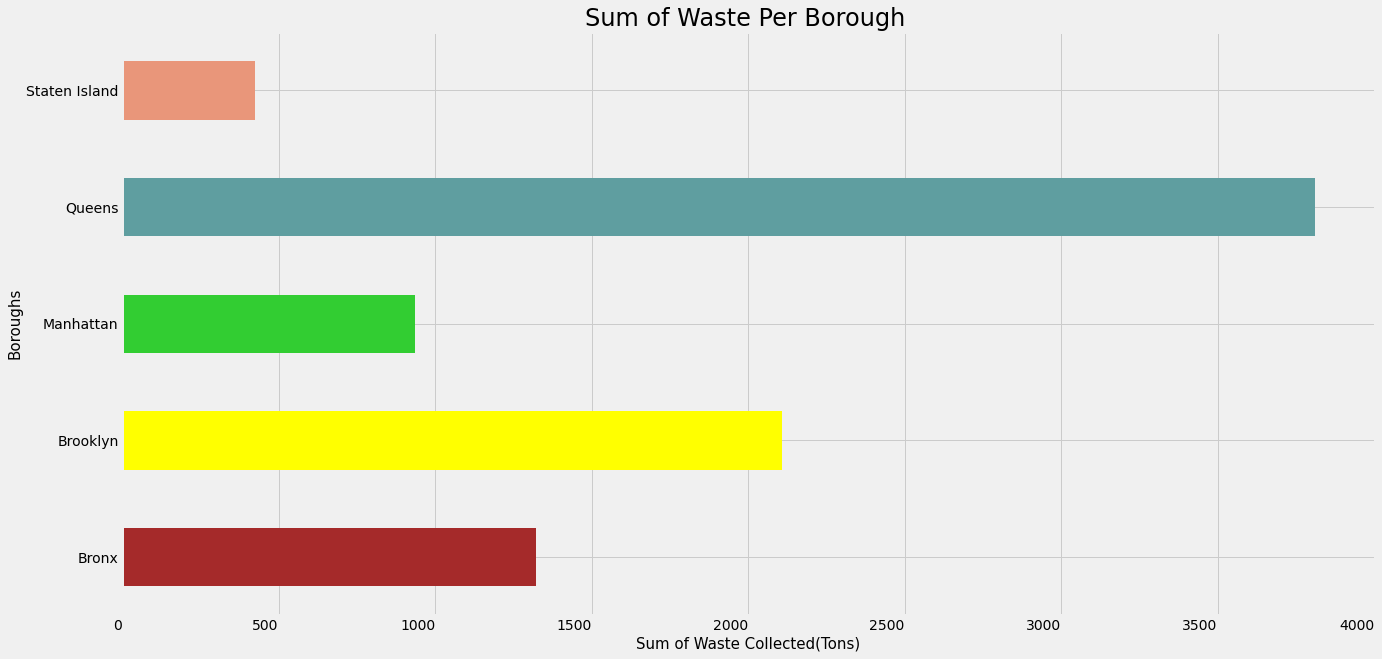

In [26]:
from matplotlib import style


plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("brown", "yellow", "limegreen",'cadetblue','darksalmon')
during_covid.groupby('BOROUGH')['RESORGANICSTONS'].sum().plot(kind='barh',color=color)
ax.set_title("Sum of Waste Per Borough ",size=24)
ax.set_xlabel('Sum of Waste Collected(Tons)',size=15)
ax.set_ylabel('Boroughs', size=15)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
plt.show()

The borough that had the largest average amount of food waste is 
Queens, and the borough that had the least average amount of food waste per borough was Manhattan. 

In [27]:
during_covid.groupby('BOROUGH')['RESORGANICSTONS'].mean()

BOROUGH
Bronx             9.182639
Brooklyn          9.753704
Manhattan         6.493750
Queens           22.422941
Staten Island    11.788889
Name: RESORGANICSTONS, dtype: float64

# From this, we are able to draw the conclusion that the borough that had the most food waste on average throughout this pandemic has been Queens. 

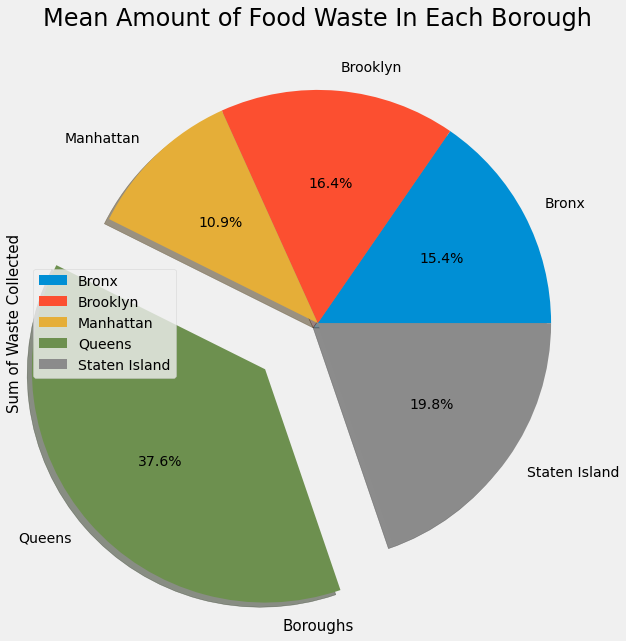

In [28]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
#color = ("blue", "red", "purple",'cadetblue','darksalmon')
ax.pie(during_covid.groupby('BOROUGH')['RESORGANICSTONS'].mean(),explode =(0,0,0, 0.3,0),labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],autopct='%1.1f%%',shadow = True)
ax.set_title("Mean Amount of Food Waste In Each Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Sum of Waste Collected', size=15)
ax.legend(loc='center left')
plt.show()

# Since we have filled our data with 0's the minimum amount of value for the boroughs that had food waste is 0. 

In [29]:
during_covid.groupby('BOROUGH')['RESORGANICSTONS'].min()

BOROUGH
Bronx            0.0
Brooklyn         0.0
Manhattan        0.0
Queens           0.0
Staten Island    0.0
Name: RESORGANICSTONS, dtype: float64

# The maximum amount of food waste was found in Queens. 

In [30]:
during_covid.groupby('BOROUGH')['RESORGANICSTONS'].max()

BOROUGH
Bronx            141.7
Brooklyn         115.5
Manhattan         45.3
Queens           196.5
Staten Island    169.1
Name: RESORGANICSTONS, dtype: float64

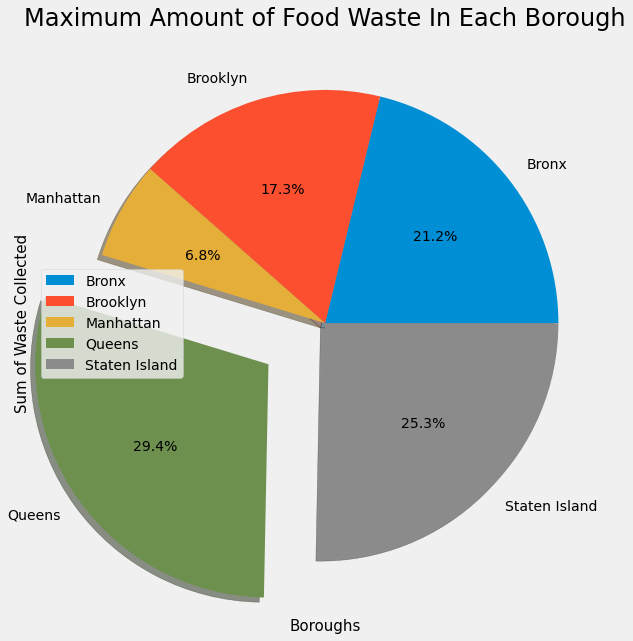

In [31]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
#color = ("blue", "red", "purple",'cadetblue','darksalmon')
ax.pie(during_covid.groupby('BOROUGH')['RESORGANICSTONS'].max(),explode =(0,0,0, 0.3,0),labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],autopct='%1.1f%%',shadow = True)
ax.set_title("Maximum Amount of Food Waste In Each Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Sum of Waste Collected', size=15)
ax.legend(loc='center left')
plt.show()

# The borough that refused to collect tons of waste on average the most, was Staten Island. 

In [32]:
during_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].mean()

BOROUGH
Bronx            3069.575000
Brooklyn         3996.414352
Manhattan        2732.111806
Queens           4503.315882
Staten Island    5564.483333
Name: REFUSETONSCOLLECTED, dtype: float64

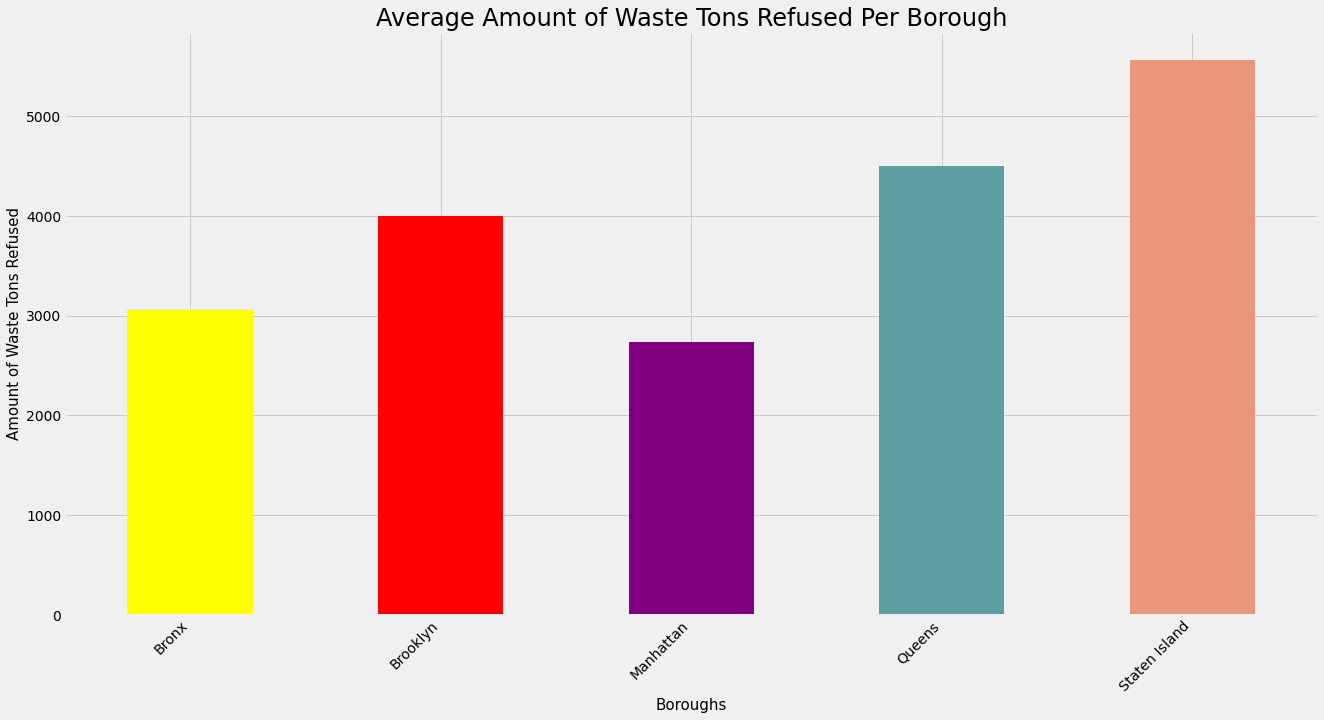

In [33]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("yellow", "red", "purple",'cadetblue','darksalmon')
during_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].mean().plot(kind='bar',color=color)
ax.set_title("Average Amount of Waste Tons Refused Per Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Amount of Waste Tons Refused', size=15)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()

# The borugh that had the most amount of waste that they refused was Queens. 

In [34]:
during_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].max()

BOROUGH
Bronx            4959.5
Brooklyn         7031.3
Manhattan        5527.1
Queens           8585.7
Staten Island    7306.6
Name: REFUSETONSCOLLECTED, dtype: float64

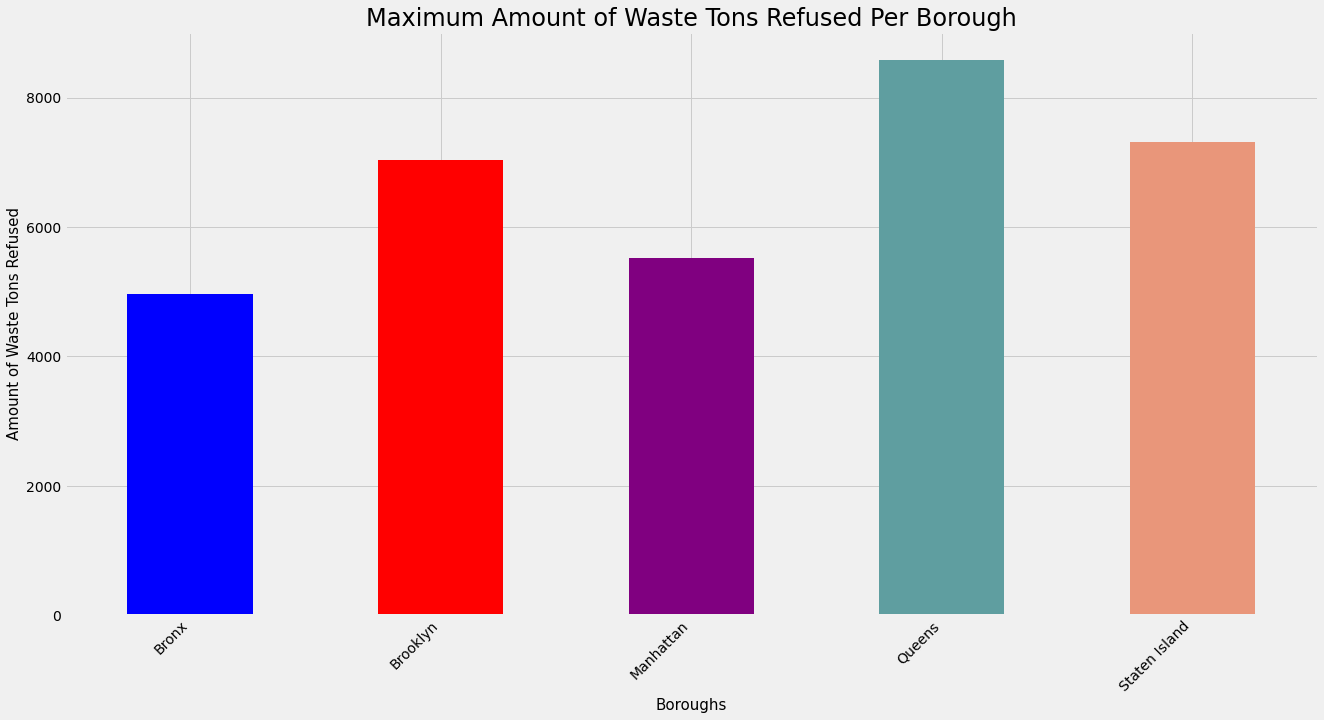

In [35]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("blue", "red", "purple",'cadetblue','darksalmon')
during_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].max().plot(kind='bar',color=color)
ax.set_title("Maximum Amount of Waste Tons Refused Per Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Amount of Waste Tons Refused', size=15)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()

The Borough that had the least Amount of Waste Collected was 
Manhattan,due to the fact that we filled our missing values with 0, 
it shows inaccuracies within our data that Queens had the least amount of 
food waste when it had the most amount of waste they refused.

In [36]:
during_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].min()

BOROUGH
Bronx            1346.8
Brooklyn         1727.2
Manhattan         900.2
Queens              0.0
Staten Island    3418.3
Name: REFUSETONSCOLLECTED, dtype: float64

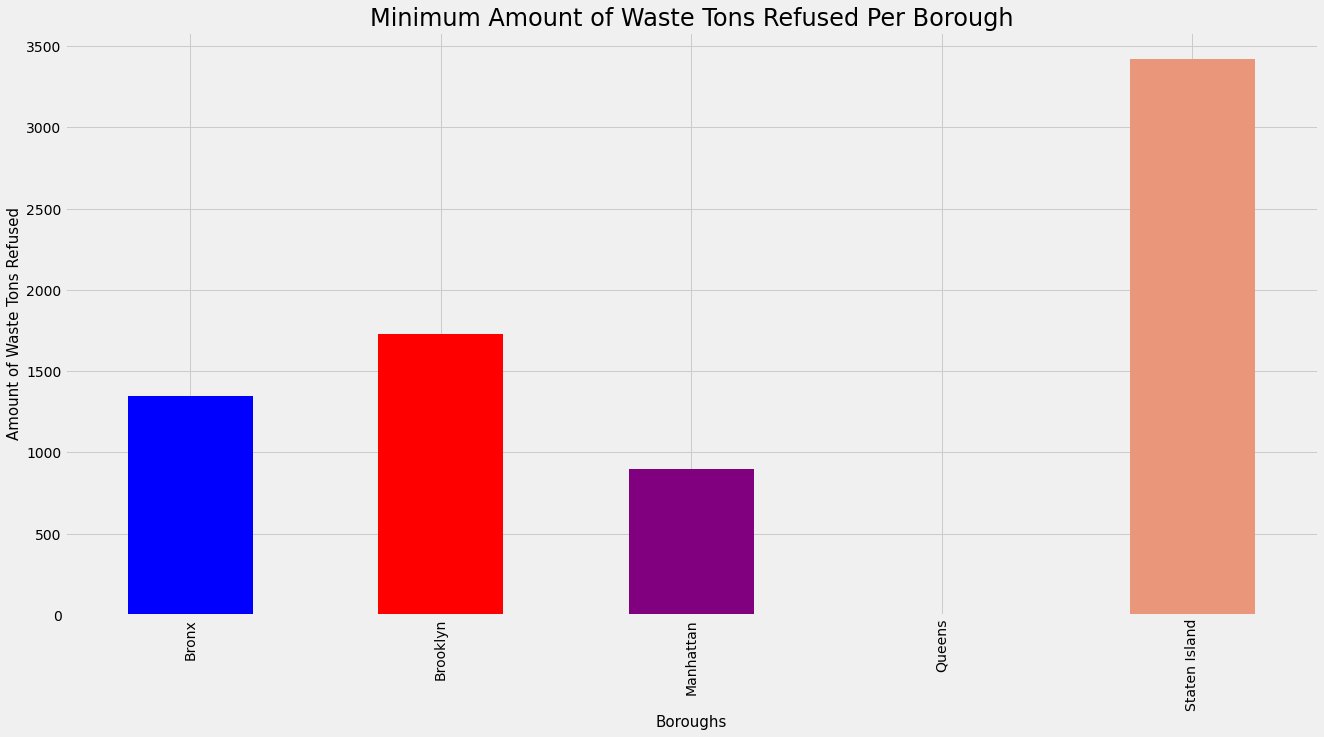

In [37]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("blue", "red", "purple",'cadetblue','darksalmon')
during_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].min().plot(kind='bar',color=color)
ax.set_title("Minimum Amount of Waste Tons Refused Per Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Amount of Waste Tons Refused', size=15)
plt.show()

# On average, the borough that had the most amount of school waste was Staten Island 

In [38]:
during_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].mean()

BOROUGH
Bronx            0.647917
Brooklyn         4.582870
Manhattan        4.412500
Queens           4.574118
Staten Island    4.850000
Name: SCHOOLORGANICTONS, dtype: float64

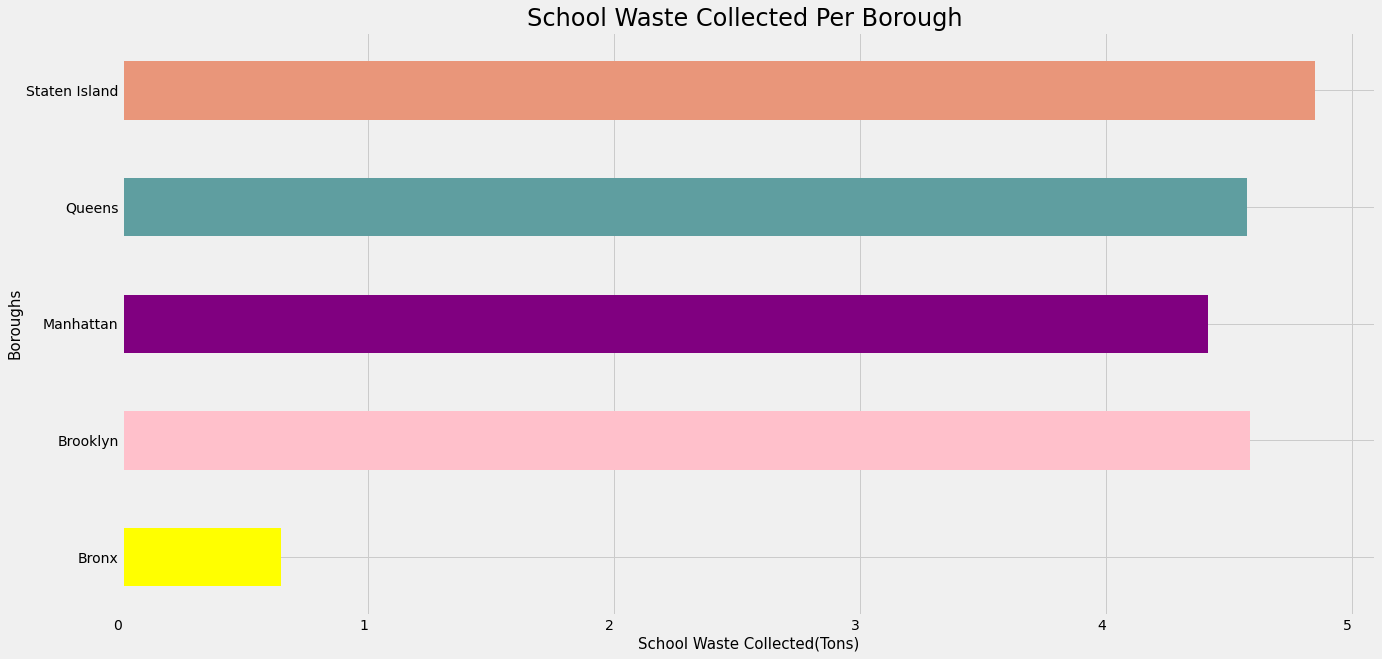

In [39]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("yellow", "pink", "purple",'cadetblue','darksalmon')
during_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].mean().plot(kind='barh',color=color)
ax.set_title("School Waste Collected Per Borough ",size=24)
ax.set_xlabel('School Waste Collected(Tons)',size=15)
ax.set_ylabel('Boroughs', size=15)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
plt.show()

# The maximum amount of School Waste Was Found in Brooklyn 

In [40]:
during_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].max()

BOROUGH
Bronx             43.6
Brooklyn         132.5
Manhattan         63.1
Queens            82.1
Staten Island     46.2
Name: SCHOOLORGANICTONS, dtype: float64

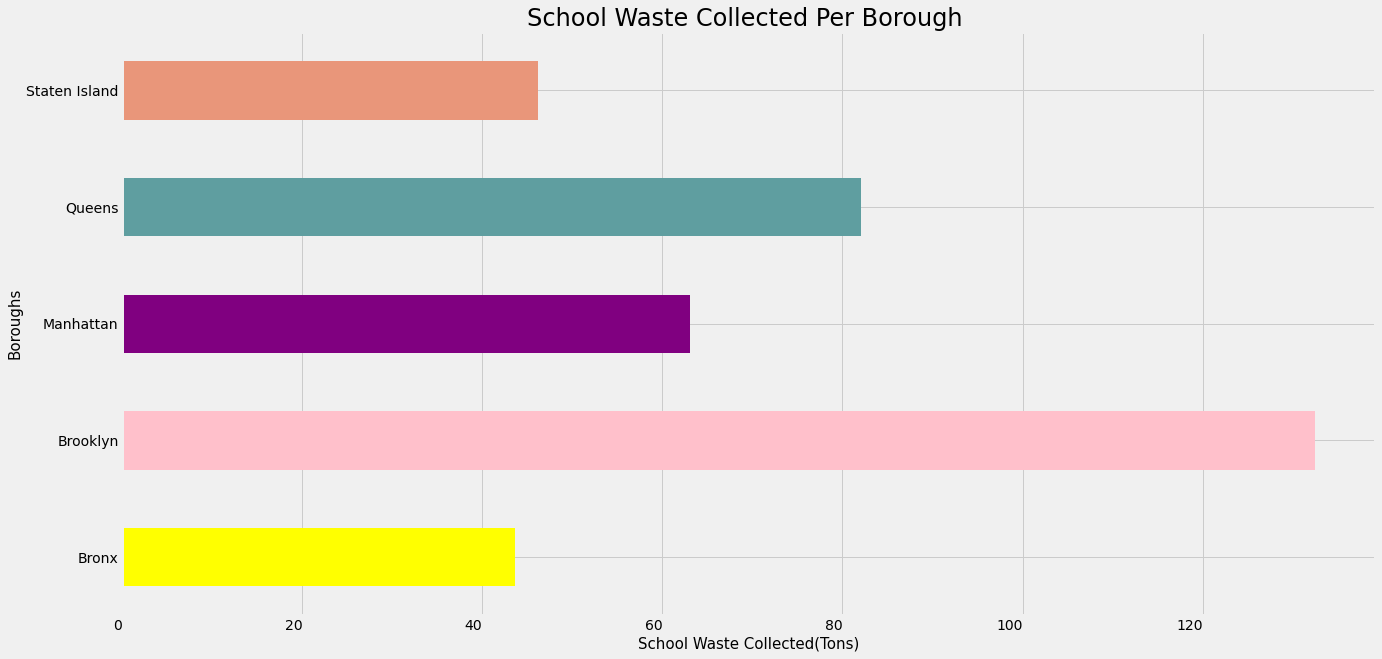

In [41]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("yellow", "pink", "purple",'cadetblue','darksalmon')
during_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].max().plot(kind='barh',color=color)
ax.set_title("School Waste Collected Per Borough ",size=24)
ax.set_xlabel('School Waste Collected(Tons)',size=15)
ax.set_ylabel('Boroughs', size=15)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
plt.show()

In [42]:
during_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].min()

BOROUGH
Bronx            0.0
Brooklyn         0.0
Manhattan        0.0
Queens           0.0
Staten Island    0.0
Name: SCHOOLORGANICTONS, dtype: float64

# Conclusions Drawn:
- During COVID, we are able to draw the conclusion that the the reason why Manhattan could have had the least amount of food waste,was due to the fact that many buisness were closed. Majority of resturants in Manhattan, shutdown due to rent. 
- Many people, in Manhattan also have a higher socio - economic status therefore they lack food insecuirty. 
- Alot of people during COVID - 19 also moved out during the pandemic to other states. 
- Due to the fact that Queens, refused a high amount of waste collection  this increased the amount of food wastein general that the borough had. 

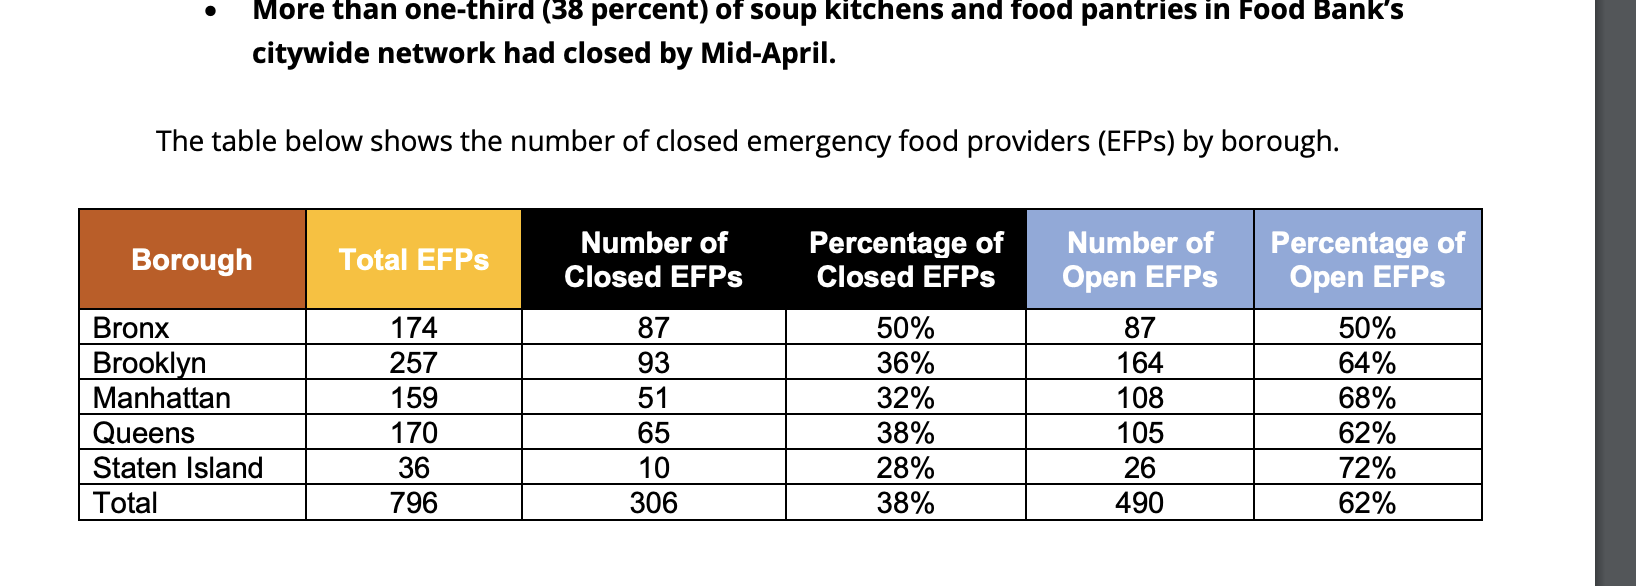

In [43]:
from IPython.display import Image
Image('food-pantries.png')

Queens,Staten Island,and Manhattan seem to be the boroughs that have the least amount 
of food insecurity, due to the fact that during the pandemic, they had the 
least amount of soup kitchens and food pantries close during the pandemic. 

During the pandemic, Staten Island remained 72% of it's 36 soup kitchens opened. 
Bronx closed the most amount of soup-kitchens and emergency food providers. 
Queens remained 62% of its Emergency Food Providers open, and only 38% closed.
Manhattan remained a large amount of food providers open with 68%
and Brooklyn who has the largest amount of food providers closed the second most 
amount of providers. 

# Now,let's take a look at the data before COVID-19. So let's place this data into a seperate dataframe to compare. 

In [44]:
before_covid = df[df['Year'] == 2019]
before_covid

BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  RESORGANICSTONS  \
57          Brooklyn                07               3342.5             79.9   
59          Brooklyn                07               3263.2             69.7   
87     Staten Island                03               4392.4              0.0   
92     Staten Island                03               5757.2              0.0   
93     Staten Island                03               6037.6              0.0   
...              ...               ...                  ...              ...   
21260      Manhattan                01               1366.7             26.4   
21305       Brooklyn                04               3038.9              0.0   
21351          Bronx                03               1985.8              0.0   
21401          Bronx                06               1921.2             10.6   
21404          Bronx                06               2246.0             12.1   

       SCHOOLORGANICTONS  BOROUGH_ID  Year  Month  
57                 118.9         3.0  2019     10  
59                   0.0         3.0  2019      8  
87                  19.2         5.0  2019      2  
92                   0.0         5.0  2019      8  
93                  21.4         5.0  2019      4  
...                  ...         ...   ...    ...  
21260                0.0         1.0  2019      7  
21305                0.0         3.0  2019      4  
21351                0.0         2.0  2019      5  
21401               29.7         2.0  2019      2  
21404               34.7         2.0  2019      4  

[708 rows x 8 columns]

In [45]:
before_covid_sum = df[df['Year'] == 2019][['RESORGANICSTONS','SCHOOLORGANICTONS']].sum()
before_covid_sum

RESORGANICSTONS      32834.3
SCHOOLORGANICTONS     8205.2
dtype: float64

# The average of waste per borough before COVID was the highest in Queens

In [46]:
before_covid.groupby('BOROUGH')['RESORGANICSTONS'].mean()

BOROUGH
Bronx            40.370833
Brooklyn         36.064352
Manhattan        18.884028
Queens           84.993452
Staten Island    62.022222
Name: RESORGANICSTONS, dtype: float64

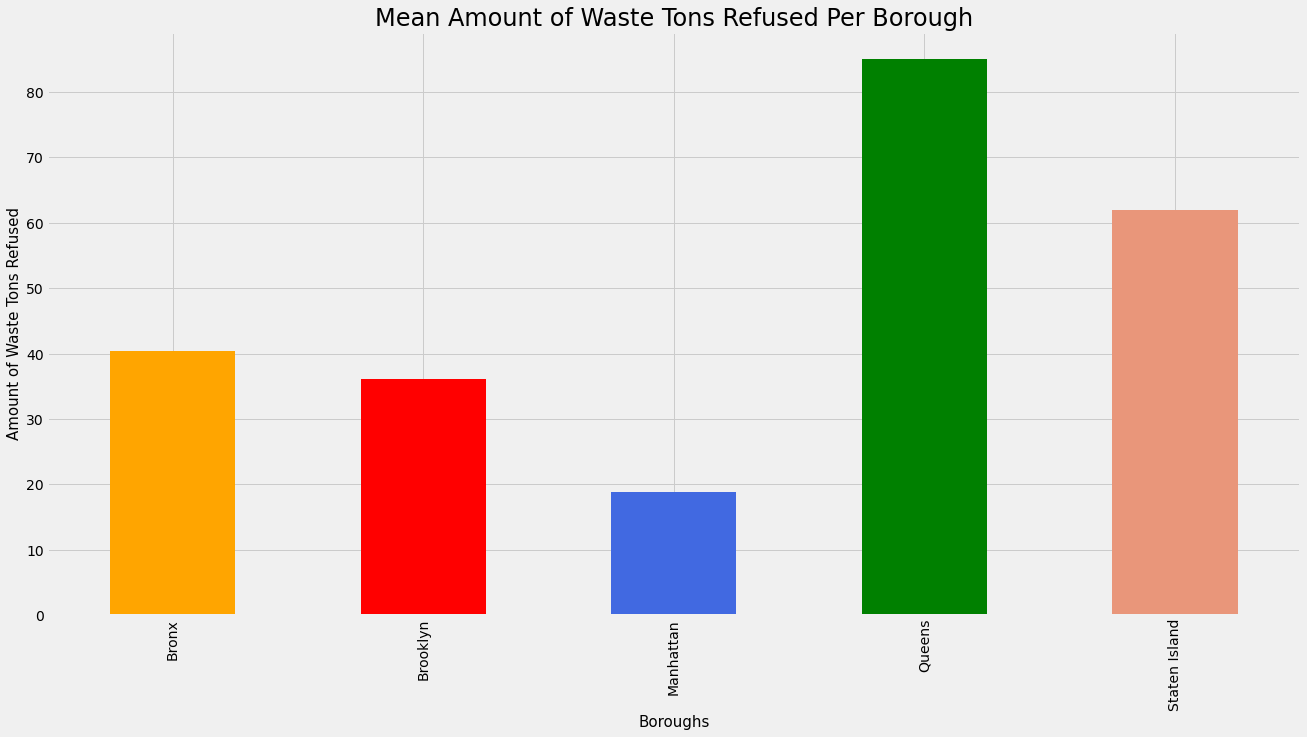

In [47]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("orange", "red", "royalblue",'green','darksalmon')
before_covid.groupby('BOROUGH')['RESORGANICSTONS'].mean().plot(kind='bar',color=color)
ax.set_title("Mean Amount of Waste Tons Refused Per Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Amount of Waste Tons Refused', size=15)
plt.show()

# The maximum of waste was found in the Queens. 

In [48]:
before_covid.groupby('BOROUGH')['RESORGANICSTONS'].max()

BOROUGH
Bronx            286.3
Brooklyn         149.3
Manhattan         52.5
Queens           356.4
Staten Island    321.0
Name: RESORGANICSTONS, dtype: float64

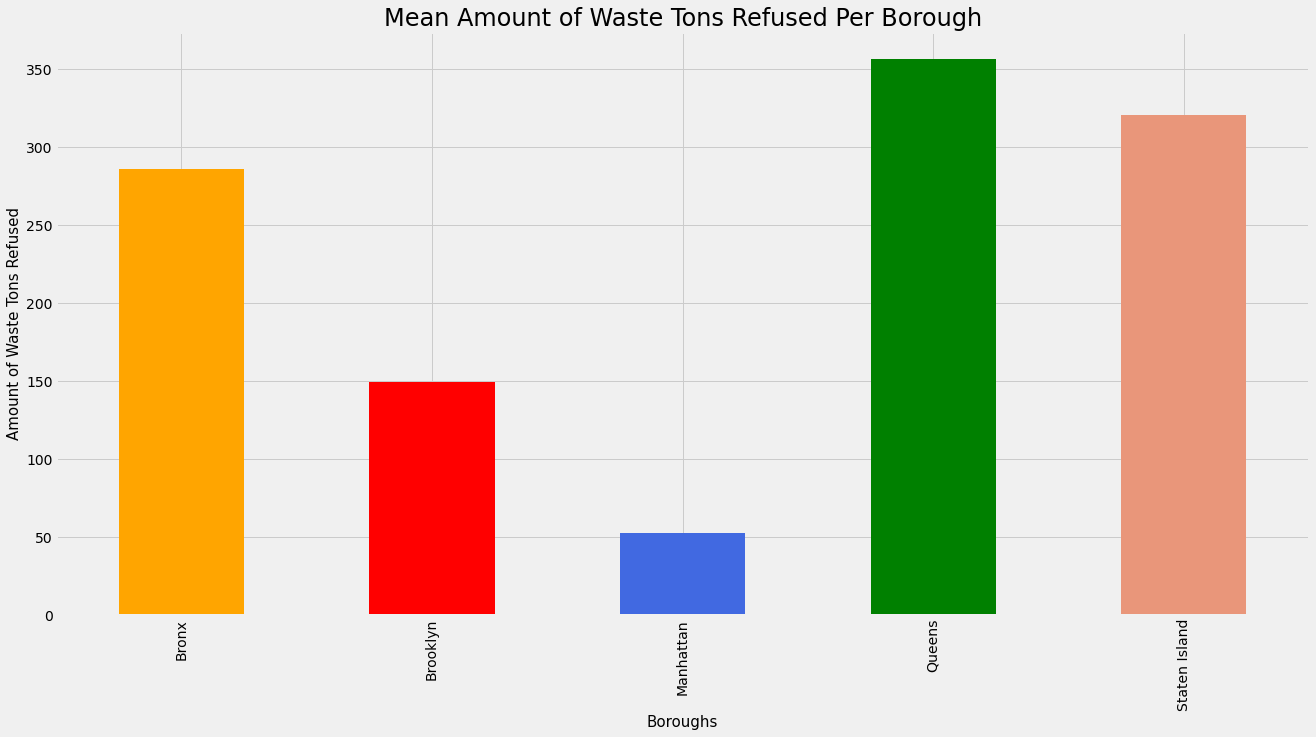

In [49]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("orange", "red", "royalblue",'green','darksalmon')
before_covid.groupby('BOROUGH')['RESORGANICSTONS'].max().plot(kind='bar',color=color)
ax.set_title("Mean Amount of Waste Tons Refused Per Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Amount of Waste Tons Refused', size=15)
plt.show()

In [50]:
before_covid.groupby('BOROUGH')['RESORGANICSTONS'].min()

BOROUGH
Bronx            0.0
Brooklyn         0.0
Manhattan        0.0
Queens           0.0
Staten Island    0.0
Name: RESORGANICSTONS, dtype: float64

# The average amount of waste that was refused to be collected was highest in Staten Island. 

In [51]:
before_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].mean()

BOROUGH
Bronx            2817.238194
Brooklyn         3763.347685
Manhattan        2882.412500
Queens           4164.265476
Staten Island    5004.658333
Name: REFUSETONSCOLLECTED, dtype: float64

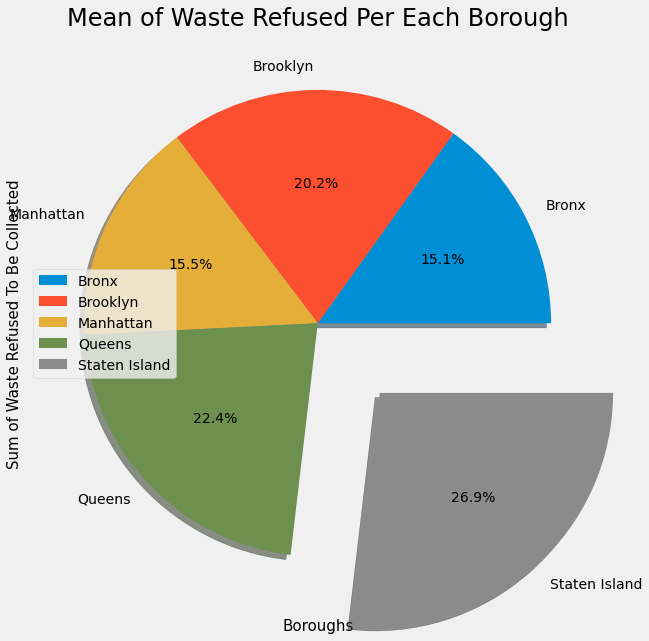

In [52]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
#color = ("blue", "red", "purple",'cadetblue','darksalmon')
ax.pie(before_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].mean(),explode =(0,0,0, 0,0.4),labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],autopct='%1.1f%%',shadow = True)
ax.set_title("Mean of Waste Refused Per Each Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Sum of Waste Refused To Be Collected', size=15)
ax.legend(loc='center left')
plt.show()

# The maximum amount of waste that was refused to be collected was found in Queens. 

In [53]:
before_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].max()

BOROUGH
Bronx            4278.4
Brooklyn         6687.2
Manhattan        5618.1
Queens           7905.4
Staten Island    6938.4
Name: REFUSETONSCOLLECTED, dtype: float64

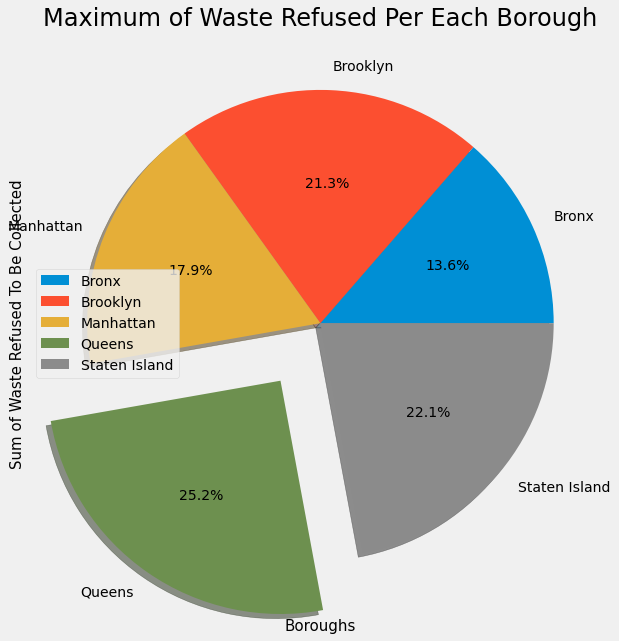

In [54]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
#color = ("blue", "red", "purple",'cadetblue','darksalmon')
ax.pie(before_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].max(),explode =(0,0,0, 0.3,0),labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],autopct='%1.1f%%',shadow = True)
ax.set_title("Maximum of Waste Refused Per Each Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Sum of Waste Refused To Be Collected', size=15)
ax.legend(loc='center left')
plt.show()

# The borough that had the minimum amount of waste was Manhattan 

In [55]:
before_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].min()

BOROUGH
Bronx            1318.1
Brooklyn         1734.5
Manhattan        1180.2
Queens           2146.2
Staten Island    3259.7
Name: REFUSETONSCOLLECTED, dtype: float64

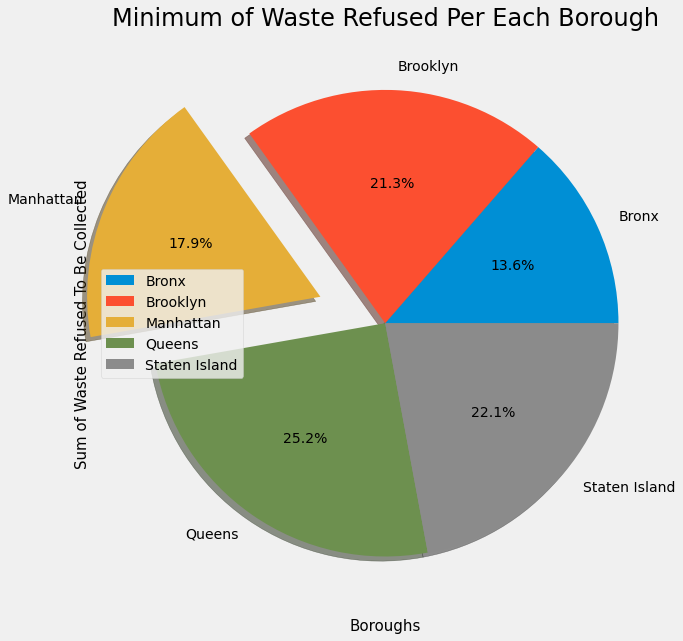

In [56]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
#color = ("blue", "red", "purple",'cadetblue','darksalmon')
ax.pie(before_covid.groupby('BOROUGH')['REFUSETONSCOLLECTED'].max(),explode =(0,0,0.3,0,0),labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],autopct='%1.1f%%',shadow = True)
ax.set_title("Minimum of Waste Refused Per Each Borough",size=24)
ax.set_xlabel('Boroughs',size=15)
ax.set_ylabel('Sum of Waste Refused To Be Collected', size=15)
ax.legend(loc='center left')
plt.show()

# On average, Staten Island had the most amount of school ton waste per borough. 

In [57]:
before_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].mean()

BOROUGH
Bronx             3.059722
Brooklyn         13.251389
Manhattan        17.293056
Queens           10.489286
Staten Island    18.052778
Name: SCHOOLORGANICTONS, dtype: float64

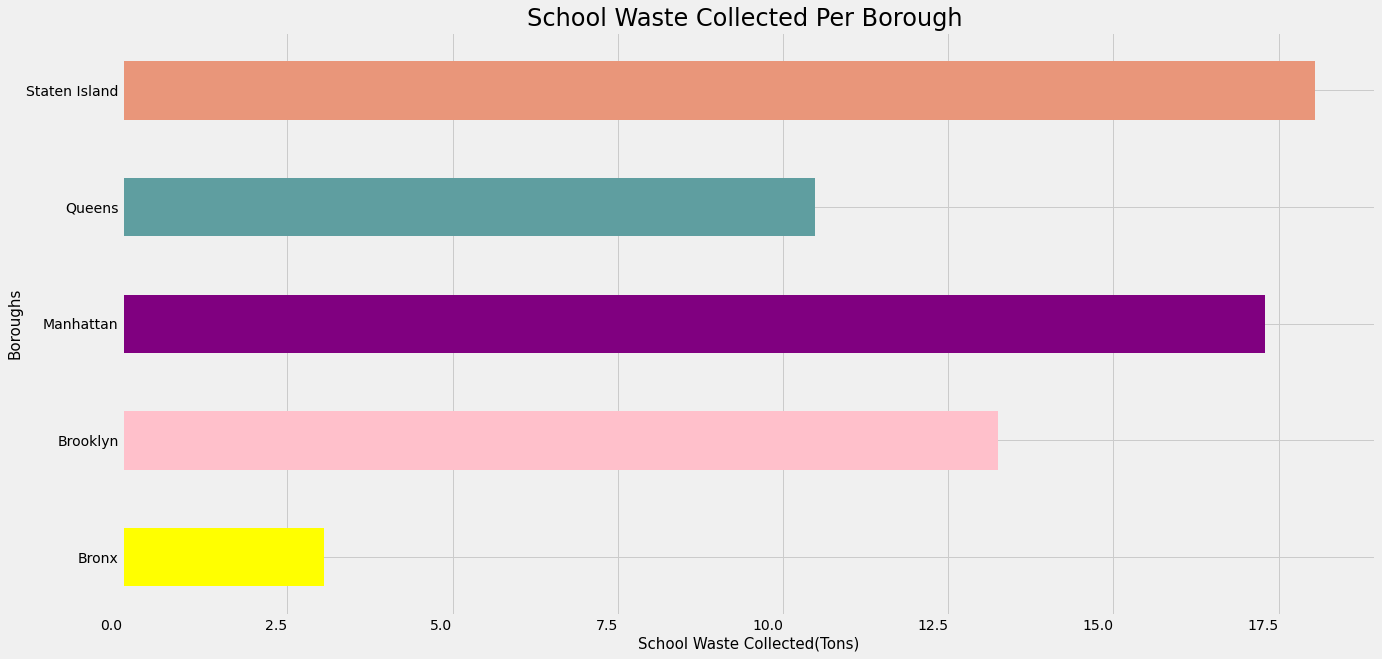

In [58]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("yellow", "pink", "purple",'cadetblue','darksalmon')
before_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].mean().plot(kind='barh',color=color)
ax.set_title("School Waste Collected Per Borough ",size=24)
ax.set_xlabel('School Waste Collected(Tons)',size=15)
ax.set_ylabel('Boroughs', size=15)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
plt.show()

# The maximum amount of school waste was found in Queens. 

In [59]:
before_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].max()

BOROUGH
Bronx             58.0
Brooklyn         119.4
Manhattan         88.5
Queens           147.8
Staten Island     46.7
Name: SCHOOLORGANICTONS, dtype: float64

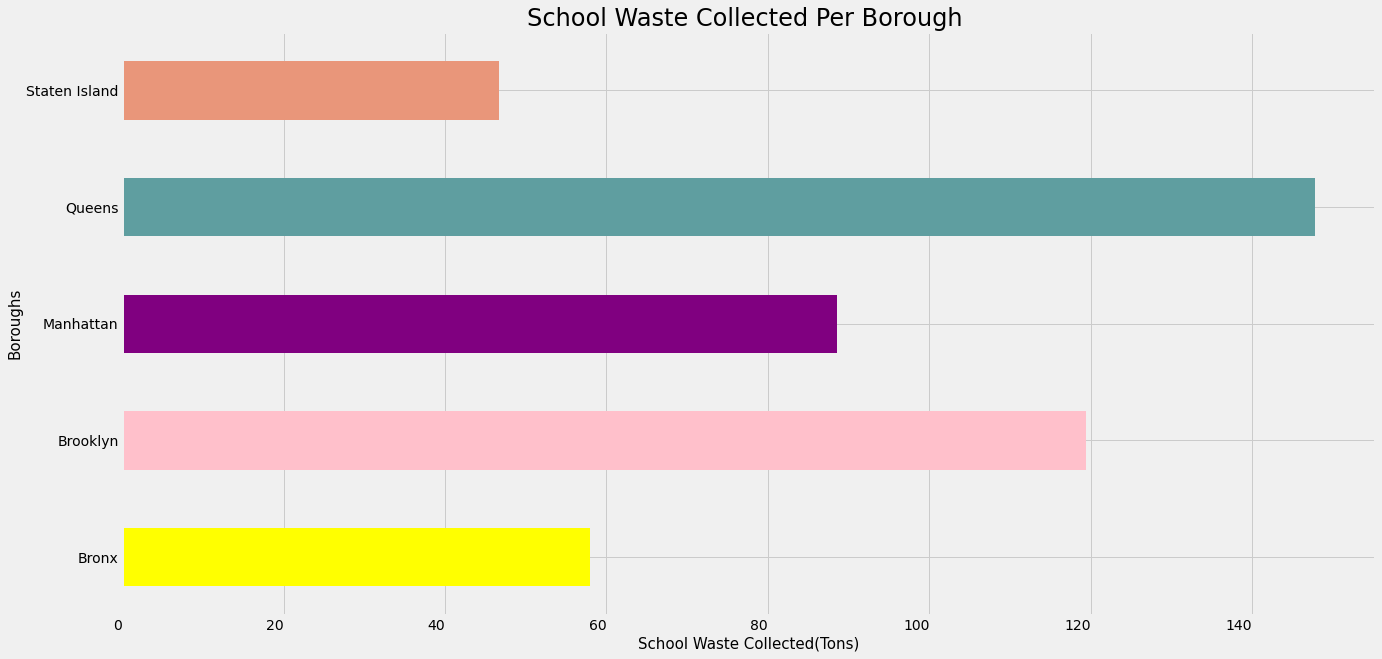

In [60]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("yellow", "pink", "purple",'cadetblue','darksalmon')
before_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].max().plot(kind='barh',color=color)
ax.set_title("School Waste Collected Per Borough ",size=24)
ax.set_xlabel('School Waste Collected(Tons)',size=15)
ax.set_ylabel('Boroughs', size=15)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
plt.show()

In [61]:
before_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].min()

BOROUGH
Bronx            0.0
Brooklyn         0.0
Manhattan        0.0
Queens           0.0
Staten Island    0.0
Name: SCHOOLORGANICTONS, dtype: float64

# Conclusions Drawn:

- Before and after COVID, the most amount of waste was found in Queens. 
- There was a reduction in waste during COVID in the Bronx. 
- Overall waste that was refused to be collected remained the same in each borough, with Queens having the most and Staten Island refusing the most on average. 
- We need more sanitation workers that take care of waste in Queens and Staten Island, and implement more management for residents in these boroughs. 

# Let's Contrast the Data Before COVID- 19 and During COVID

# The Comparison Between the Refusal of Waste and School Waste before COVID and during COVID.

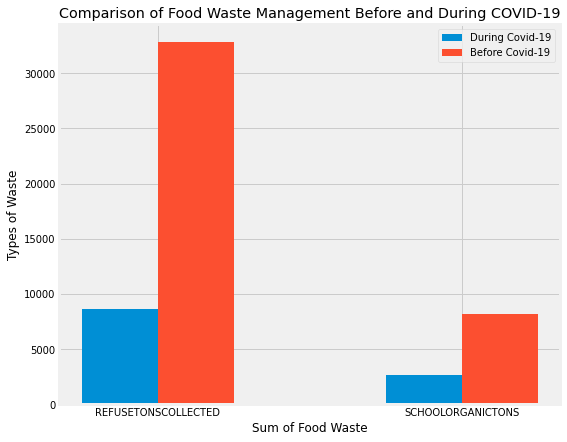

In [62]:
width = 0.25
%matplotlib inline
labels = ['REFUSETONSCOLLECTED', 'SCHOOLORGANICTONS']
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(8,7))
ax.bar(x-width/2, during_covid_sum, width=width,label='During Covid-19')
ax.bar(x+width/2, before_covid_sum,width=width,label='Before Covid-19' )
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Sum of Food Waste')
ax.set_ylabel('Types of Waste')
ax.set_title('Comparison of Food Waste Management Before and During COVID-19')
ax.legend()
plt.show()

# Conclusions Drawn:

During COVID 19, there was a decrease in the amount of tons being refused 
to be collected, and the school waste refused to be collected. 
We can assume, this was due to the decrease in the amount of schools opened
and less waste being made due to food insecurities. This approves my hypothesis. 

In [63]:
pip install panel

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [115]:
import matplotlib.gridspec as gridspec

def create_figure(plot1_f1,plot1_f2):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(22,8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.
        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        #ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums

        ## First Graph -  Scatter Plot
        color = {"Malignant" : "tab:red", "Benign":"tab:green"}
        plt.style.use('fivethirtyeight')
        fig,ax=plt.subplots(figsize=(20,10))
        color = ("yellow", "pink", "purple",'cadetblue','darksalmon')
        before_covid.groupby('BOROUGH')['SCHOOLORGANICTONS'].mean().plot(kind='barh',color=color)
        ax1.set_title("School Waste Collected Per Borough ",size=24)
        ax1.set_xlabel('School Waste Collected(Tons)',size=15)
        ax1.set_ylabel('Boroughs', size=15)
        labels = ax1.get_xticklabels()
        plt.setp(labels, rotation=0, horizontalalignment='center')

        ## Second Graph - Bar Chart
       
        

        #plt.show()
        ## Third Graph - Histogram

        plt.close(fig)
        return fig


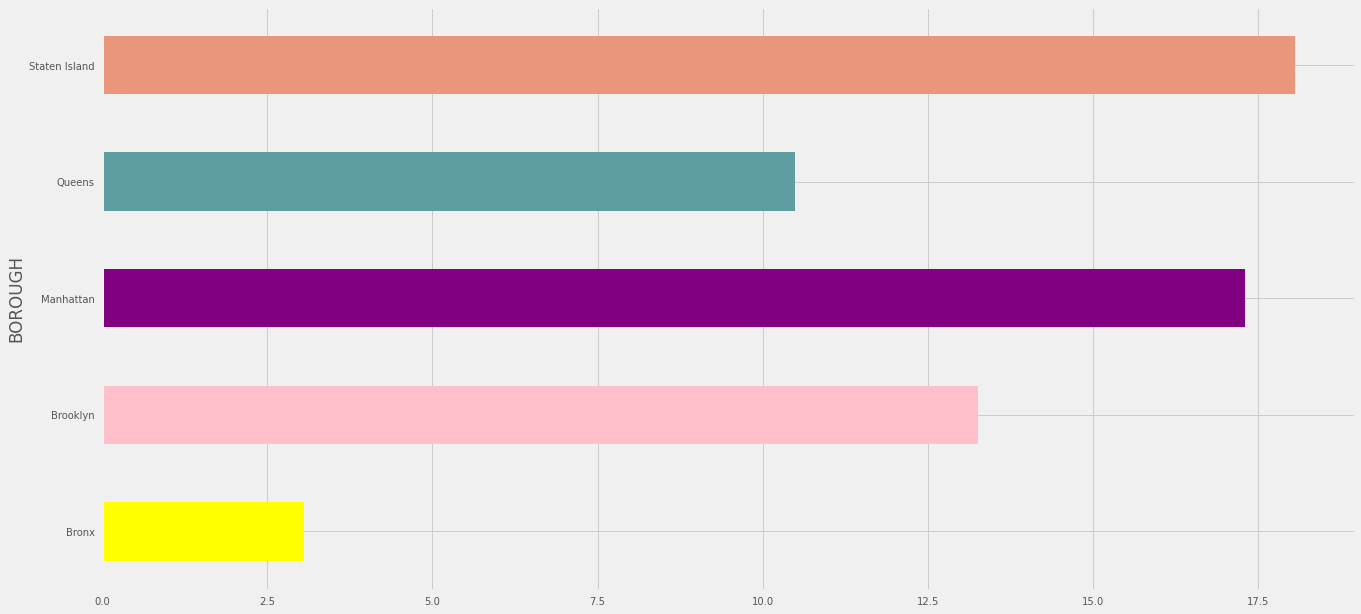

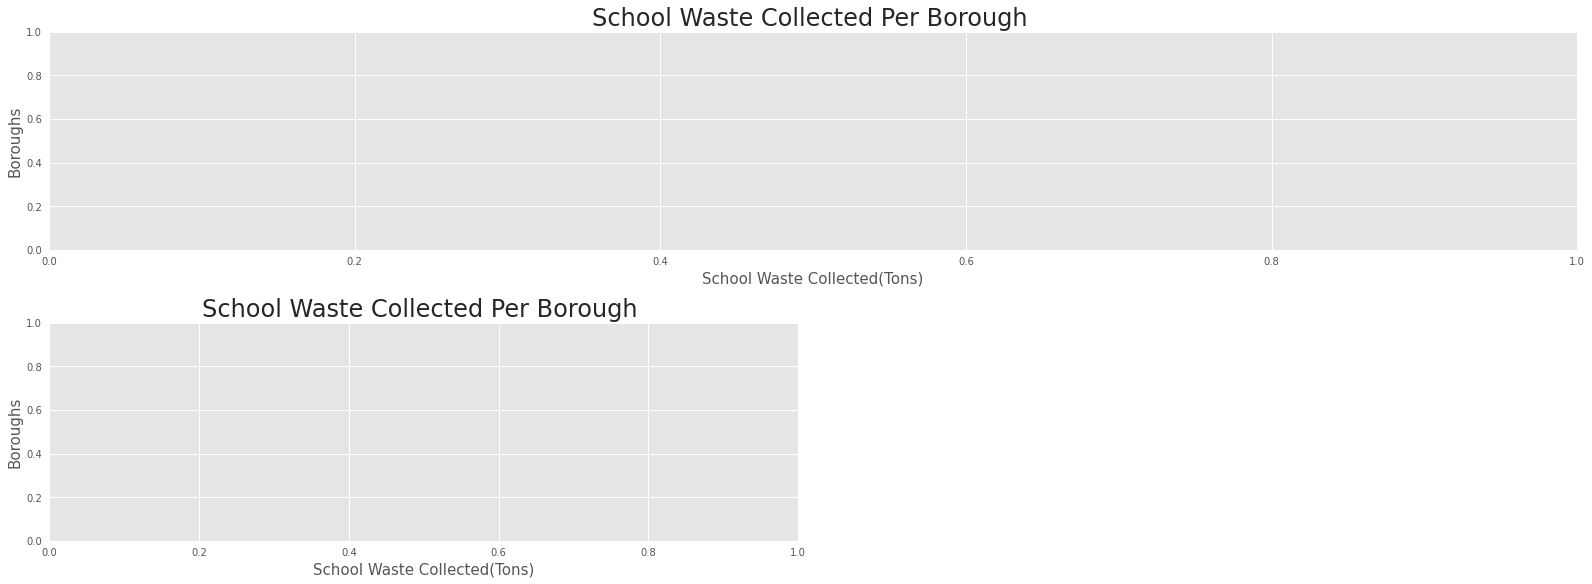

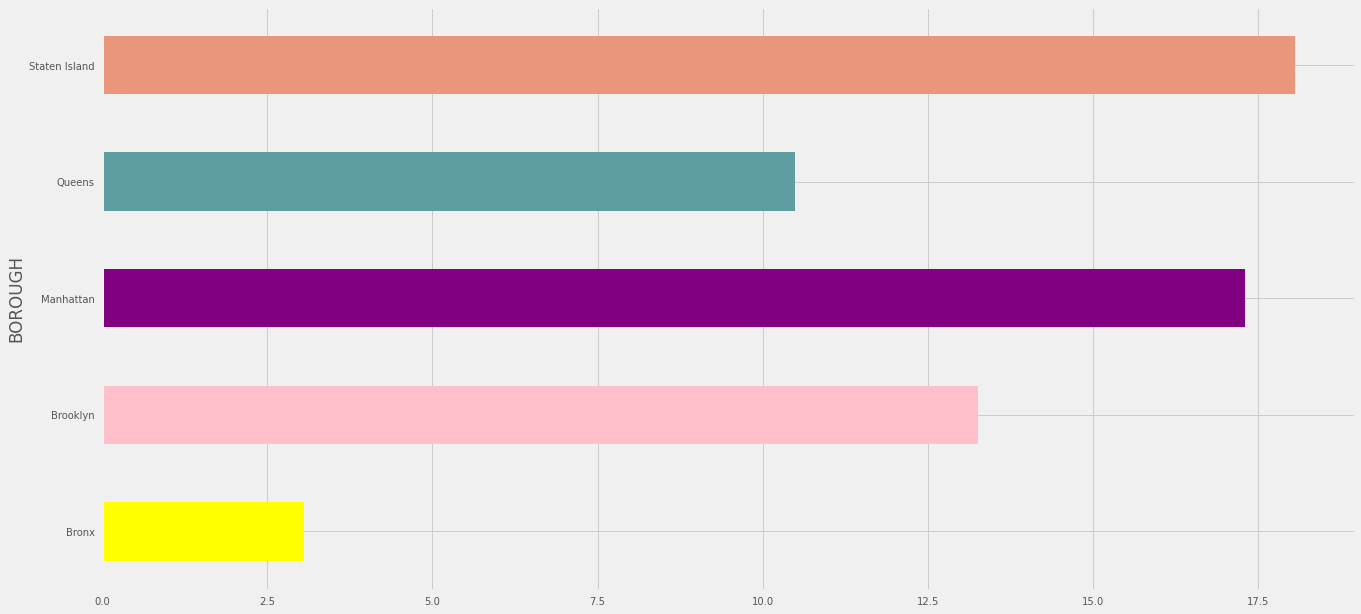

In [116]:
create_figure("School Waste","School Waste")

In [107]:
import matplotlib.pyplot as plt

Column
    [0] Column
        [0] DiscreteSlider(name='plot1_f1', options=[8600.5, 2670.8], value=8600.5)
        [1] DiscreteSlider(name='plot1_f2', options=[32834.3, 8205.2], value=32834.3)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00144')
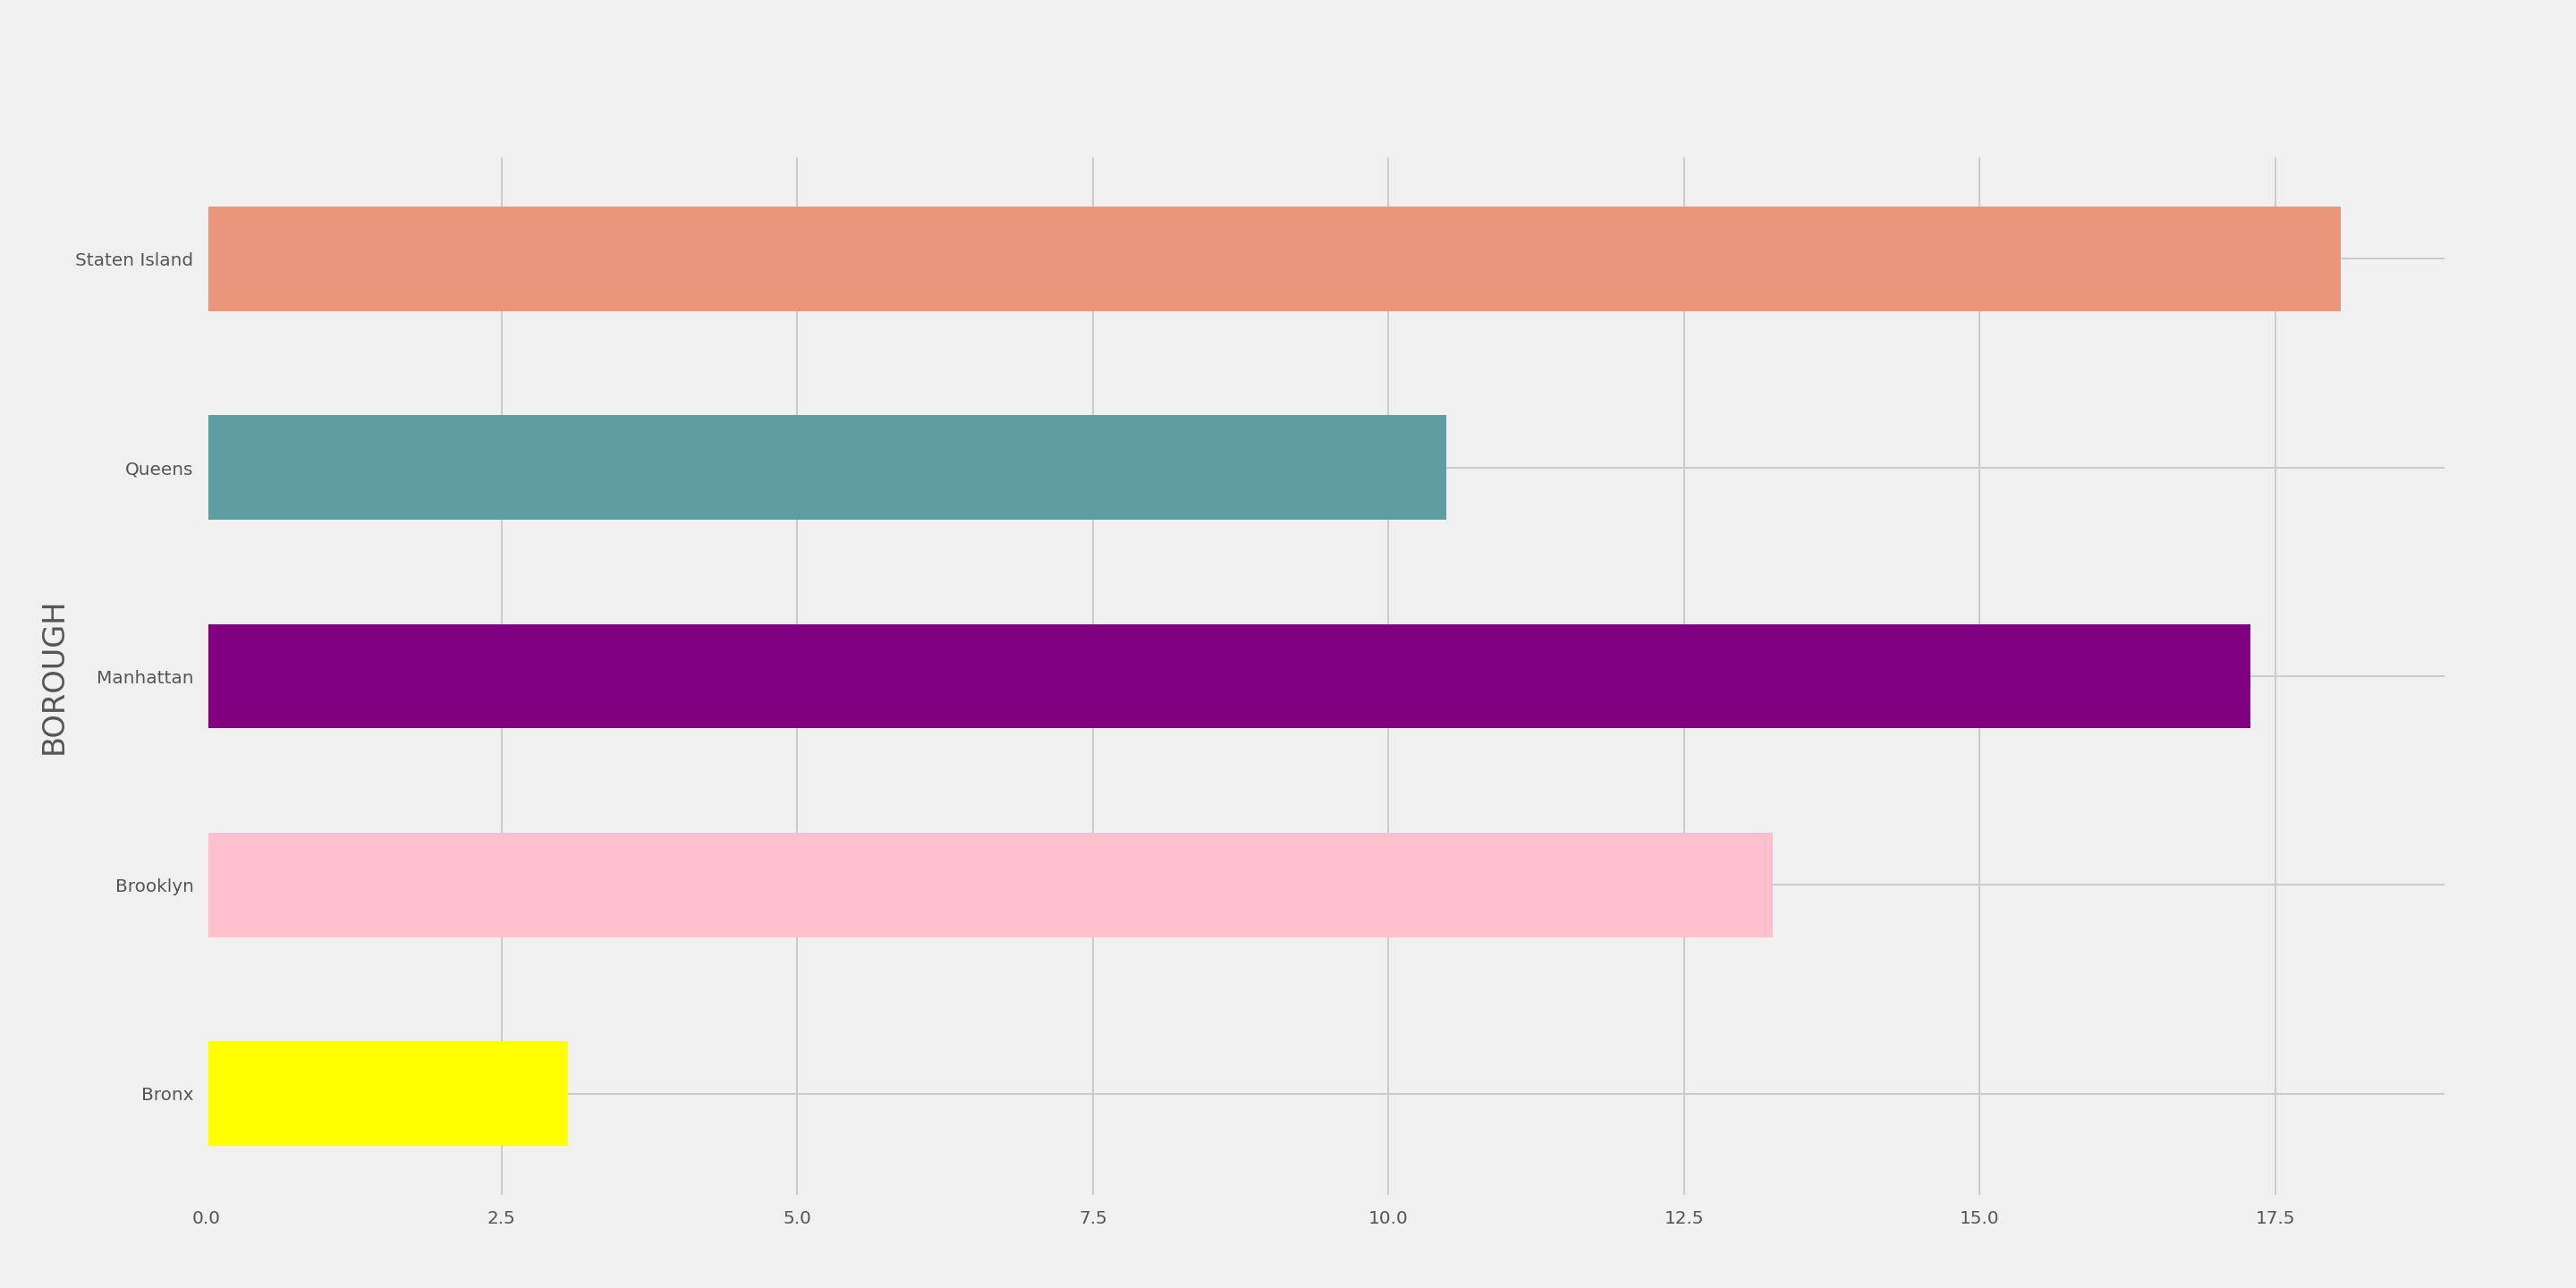

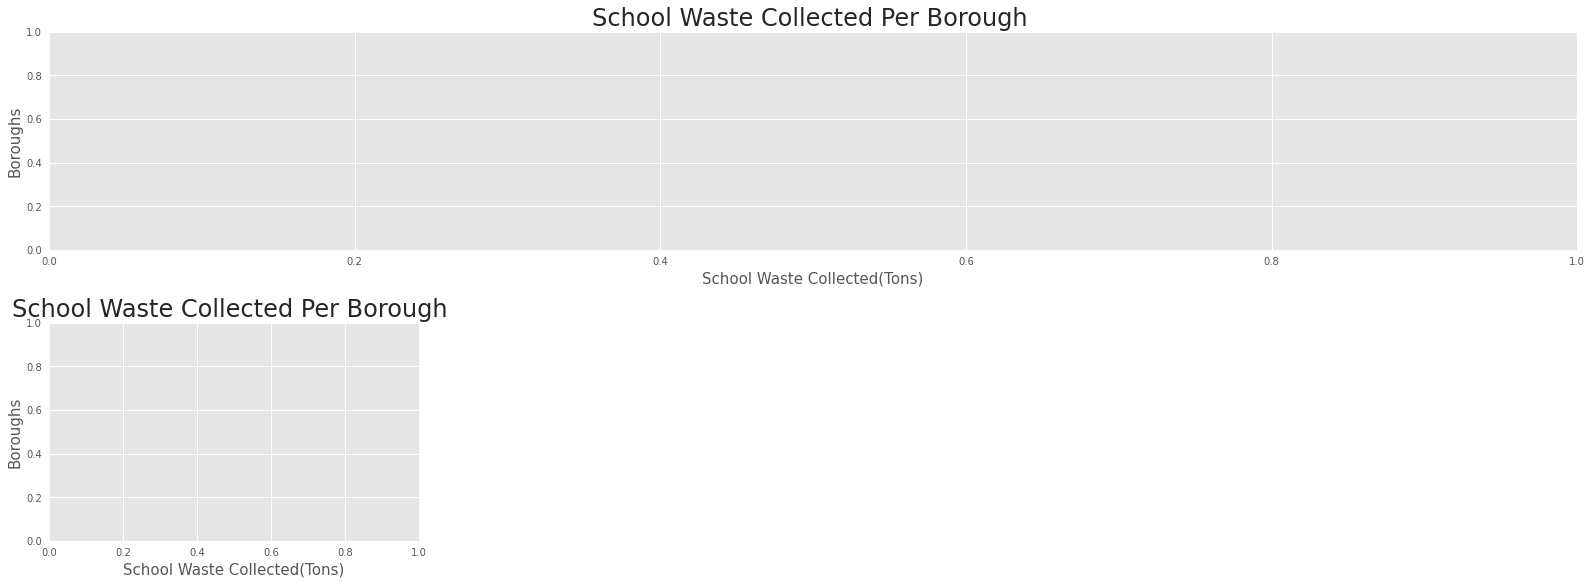

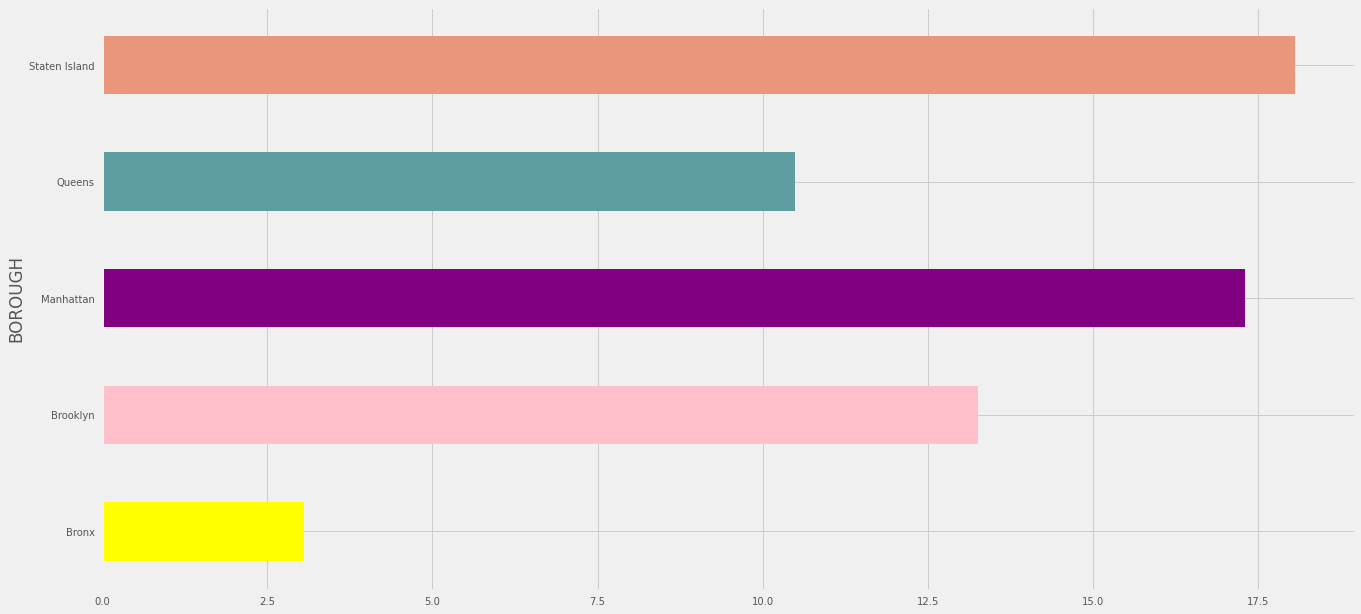

In [108]:
import panel as pn
pn.extension()

kw = dict(plot1_f1= df[df['Year'] == 2020][['RESORGANICSTONS','SCHOOLORGANICTONS']].sum(),
          plot1_f2= df[df['Year'] == 2019][['RESORGANICSTONS','SCHOOLORGANICTONS']].sum(),
          #plot2_f=,
          #plot3_f=
         )

dash1 = pn.interact(create_figure, **kw)
dash1

# Analyzing The Data of Food Waste Before and After COVID 

In [ ]:
before_refusal = df[df['Year'] == 2019][['RESORGANICSTONS']].sum()
before_refusal

In [ ]:
during_refusal = df[df['Year'] == 2020][['RESORGANICSTONS']].sum()
during_refusal

In [ ]:
width = 0.18
%matplotlib inline
labels = ['RESORGANICSTONS']
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(8,7))
ax.bar(x-width/2, during_refusal, width=width,label='During Covid-19')
ax.bar(x+width/2, before_refusal,width=width,label='Before Covid-19' )
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Sum of Food Waste')
ax.set_ylabel('Types of Waste')
ax.set_title('Comparison of Food Waste Management Before and During COVID-19')
ax.legend()
plt.show()

# Conclusions Drawn:

The sum of food waste in households decreased during COVID -19 approving my hypothesis. 

# Problems With The DataSet:
 - Although, it is for food waste management, they also combine much of the data with other types of waste. 
 - There was alot of null data for a whole month, showing that the department of sanitation isn't collectivizing data for certain months or there aren't many department of sanitation workers in certain boroughs. 

# What Is The Community Doing For Food Waste Management?
- The community started implementing community fridges to place 
extra food that they had to give back to others that may need it in their community.
- The database freedge maintains the map of community fridges around the world.
- They are seem essential in communities where traditional forms of food assistance are difficult to acess. 
- Many people who are undocumented in local neighborhoods struggle with getting food benefits like SNAP. 

In [ ]:
from IPython.display import Image
Image('friendly-fridge.png')

One of the community fridges located in : 
343 Tompkins Ave, Brooklyn, NY 11216

# We Want To Analyze How The Community Fridges Impacted The Food Waste in NYC:

In [ ]:
from IPython.display import Image
Image('fridges-map.png')

In [ ]:
import matplotlib 

In [ ]:
import seaborn as sns

In [ ]:
from seaborn import heatmap

In [ ]:
%matplotlib inline

In [ ]:
import json 

In [ ]:
import pprint

# Importing The Map and Turning it Into A DataFrame 

In [ ]:
 with open('fridges.json') as fridges:
    data = json.load(fridges)
#     pprint.pprint(list(data.values()))
    values = list(data.values())
    community_fridges = []
    for element in values:
        community_fridges.append((element.get('borough'),element.get('name')))
    print (community_fridges)

In [ ]:
fridges = pd.DataFrame(community_fridges,columns=['borough','name'])
fridges

In [ ]:
fridges.isna().sum()

In [ ]:
fridges.dropna(how='any', axis=0, inplace= True)

In [ ]:
fridges

In [ ]:
fridges.isna().sum()

# We want to be able to count how many fridges are per the borough.

# We can also drop the columns that have jersey city,as it does not count as a borough for the data we are analyizing. 

In [ ]:
fridges.value_counts('borough')

In [ ]:
 fridges = fridges[fridges["borough"] != "Jersey City"]

In [ ]:
fridges = fridges[fridges["borough"] != ""]

In [ ]:
fridges.value_counts('borough')

# The maximum amount of community fridges are to be found in Brooklyn,Bronx, and Manhattan.However the minimum amount of fridges that are found are in Staten Island and Queens. 

# We want to find the correlation between fridges count per borough 


In [ ]:
x = df[df['Year'] == 2020].groupby('BOROUGH')['RESORGANICSTONS'].sum()
y = fridges.value_counts('borough')
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x,y, s=50, c="b", alpha=0.3, edgecolors="black", linewidth=1)
ax.set_xlabel('Waste Per Borough')
ax.set_ylabel('Fridges Per Borough')
ax.set_title('Correlation Between Waste and Fridges per Borough')
plt.show()

# Conclusions Drawn:

- It seems that there isn't a good relationship between the correlation of waste and fridges per borough. 
- On average, it seems that regardless of the waste the average amount of fridges per borugh are 20. 
- In areas with less waste there are less fridges. 
- In areas with more waste there are more community fridges being displaced. 
- Yet, we would need to measure a duration in time to see if the waste was to increase or decrease. 

# Further Analysis <a id='5'></a>:

# Answers to Our Research Goals:

- Did Food Waste Management Improve During COVID -19 in NYC?
      Yes Food Waste Management Did Improve from before COVID to now. 
 - How Bad Was Food Waste Management Before COVID -19 in NYC ?
      Based on our food waste management graphs, there was a contrast of a difference of 250,000 tons. 
  - What Boroughs Have The Best Food Waste Management ?
           Manhattan has the best food waste management. 
 - Did Andrew Cuomo's 4.3 Million in Grants to Reduce Food Waste Actually Make Changes ?
           This cant all be proved by data that we have, we would need to make more conclusions.However, based on the changes from 2019 to 2020, we can conclude where investments are being made it is helping the food waste. 

- Further analysis, can be drawn to figure out how school closures impacted the 
  food waste. 

- More conclusions can be drawn from zipcodes in each borough, that can allow 
  us to analyze which particular neighborhoods in each borough are going through food       insecurities, or not having enough food waste collection.

# How Can We Utilize This Data?- Actions To Be Taken:

- This data can be utilized to make decisions on food waste management and utilizing 
  management in specific boroughs. 
- With more app implemented in New York, such as Too Good To Go, that are now impacting 
    the way resturants even look at their management, it will allow us to concentrate on 
    the specific ways we utilize waste. 
- Also help Joe Biden's plan on sustabanility and stakeholders looking into Waste Management Inc. Decisions would be made on how much further to invest into sanitation, sanitation workers, and disbrute better choices in how much grocery stores, etc can mantain to reduce waste management. 

# Suggestive Business Plan:

- Implement more sanitation in Staten Island and Queens. 
- Use stakeholders to invest more into food management into local grocery stores. 
- Provide sustaniable food and healthier food that doesn't create much waste. 
  Ordering Out = More Waste
- Utilize the applications that exists that reduce food waste to map which areas they can contact more buisness to develop proper managemnt in resturants as well. 
- Implement smaller supermarkets like Trader Joes that utilize 99.5% of their food and also have a smaller percentage of selection choices reducing the amount of options that people may make, being that 10% of food waste is lost in retail. 

# Works Cited/More Information:
- https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5
- https://nycfridge.com/ -
- https://www.sciencedirect.com/science/article/abs/pii/S0048969720340468-  
- https://www.governor.ny.gov/news/governor-cuomo-announces-43-million-grants-reduce-food-waste-help-hungry-new-yorkers-and-cut